In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import reshape
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from google.colab import drive

In [0]:
drive.mount("/content/drive") 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


training 135709
testing 58161


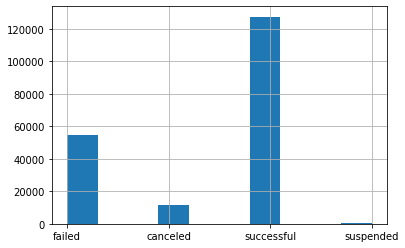

In [0]:
#Clean data
data = pd.read_csv('/content/drive/My Drive/ks-projects-201801.csv', engine='python')
data = data.query('state != "live" and state != "undefined"')
data = data.drop(columns=['ID','goal','usd pledged', 'pledged'])
data = data.query('usd_pledged_real < 5000000')
data = data.query('backers > 10')
data = data.query('usd_goal_real < 1000000')

In [0]:
#Setup data
x_data = data[['usd_goal_real']]
y_data = data[['usd_pledged_real']]
x_transformer = RobustScaler().fit(x_data)
y_transformer = RobustScaler().fit(y_data)
x_data = x_transformer.transform(x_data)
y_data = y_transformer.transform(y_data)


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [0]:
#Run simple regression model
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<function matplotlib.pyplot.show>

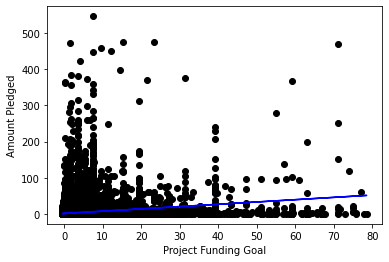

In [0]:
#Visualization
plt.scatter(
    x_train,
    y_train,
    c='black'
)

preds = reg.predict(x_train)
plt.plot(
    x_train,
    preds,
    c = 'blue'
)

plt.xlabel("Project Funding Goal")
plt.ylabel("Amount Pledged")
plt.show


In [0]:
#Statistics
import statsmodels.api as sm
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     7283.
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:28:04   Log-Likelihood:            -4.9316e+05
No. Observations:              135709   AIC:                         9.863e+05
Df Residuals:                  135707   BIC:                         9.863e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8615      0.026     33.517      0.0